<h1> <a href='http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/toctree.html'> Chapter 2:  Algorithm Analysis  </a> </h1>

In [18]:
#list1
import time

def sumOfN2(n):
   start = time.time()

   theSum = 0
   for i in range(1,n+1):  # O(N)
      theSum = theSum + i   # How many number of steps
   end = time.time()

   return theSum,end-start

def sumOfN3(n):          # O(1)
    start = time.time()
    theSum = (n*(n+1))/2
    end = time.time()
    return theSum,end-start

m=1000000              # Problem size
print("%15s%15s%15s"  % ("N", "sumOfN2", "sumOfN3" )  ) 
L = list (range (m,11*m, m))
for n in L:
    x, tx = sumOfN2(n)
    y, ty = sumOfN3(n)
    print("%15d%15.7f%15.7f" % (n, tx,ty) )

              N        sumOfN2        sumOfN3
        1000000      0.1015880      0.0000010
        2000000      0.1677761      0.0000012
        3000000      0.2758558      0.0000019
        4000000      0.3897672      0.0000019
        5000000      0.4495687      0.0000019
        6000000      0.4993272      0.0000021
        7000000      0.5763590      0.0000010
        8000000      0.6624210      0.0000012
        9000000      0.7527030      0.0000031
       10000000      0.8220761      0.0000021


In [20]:
# listing #2
#T(n)=3+3n^2+2n+1=3n^2+2n+4.

def foo(n):
    a = 5
    b = 6
    c = 10

    for i in range(n):
        for j in range(n):
            x = i * i
            y = j * j
            z = i * j

    for k in range(n):
        w = a * k + 45
        v = b * b

d = 33


* The number of assignment operations is the sum of four terms.
* T(n)=3+3$n^{2}$+2n+1=3$n^{2}$+2n+4. 
* By looking at the exponents, we can easily see that the $n^{2}$term will be dominant and therefore this fragment of code is O($n^{2}$). 
* Note that all of the other terms as well as the coefficient on the dominant term can be ignored as n grows larger.

<div class="image123">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/T_of_n.png" height="600" width="600"  />
        <figcaption style="text-align:center;"> Compare T(n) with some common Big-O functions </figcaption>
    </figure>
    </div>
 
</div>

### The computer scientist definition of "fast algorithm"

An algorithm is "fast" if its worst-case running time grows slowly with the input size.

Three principles of this kind of algorithm analysis:
* Worst-case behavior is most important
* Don't sweat small constant factors -- big picture analysis
* Asymptotic analysis -- how does behavior change as input size grows?

Seven functions that often appear in algorithm analysis:
* Constant ≈ $1$
* Logarithmic ≈ $\log n$
* Linear ≈ $n$
* N-Log-N ≈ $n \log n$
* Quadratic ≈ $n^{2}$
* Cubic ≈ $n^{3}$
* Exponential ≈ $2^{n}$

Let's look at their growth rates using matplotlib!


* The order of magnitude function describes the part of T(n) that increases the fastest as the value of n increases. 
* Order of magnitude is often called Big-O notation (for “order”) and written as O(f(n)). 
* It provides a useful approximation to the actual number of steps in the computation. 
* The function f(n) provides a simple representation of the dominant part of the original T(n).

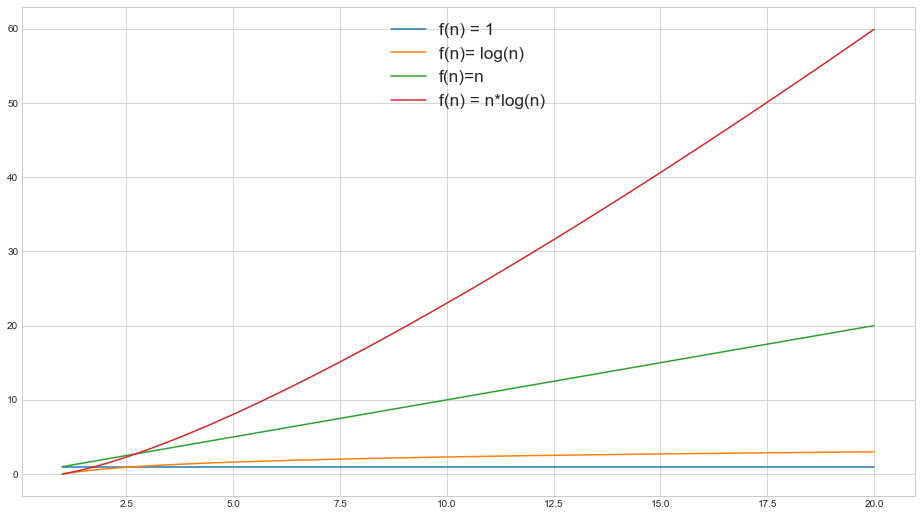

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import log
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))
import numpy as np
x = np.linspace(1, 20, 50)

# First plot a constant function
plt.plot(x, np.ones(50), label="f(n) = 1")

# Then plot log(x)
plt.plot(x, np.log(x), label='f(n)= log(n)')

# Then plot linear growth
plt.plot(x, x, label='f(n)=n')

# Now add n log n growth
plt.plot(x, np.multiply(x, np.log(x)), label="f(n) = n*log(n)")

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

2.4. An Anagram Detection Example

http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/AnAnagramDetectionExample.html

In [12]:

"""
__author__      = "Albert Tsao"
__copyright__   = "Copyright 2019"
"""
import itertools

def anagramSolution1(s1,s2):  # O(n^2)
    alist = list(s2)

    pos1 = 0
    stillOK = True

    while pos1 < len(s1) and stillOK:
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1

        if found:
            alist[pos2] = None
        else:
            stillOK = False

        pos1 = pos1 + 1

    return stillOK



def anagramSolution2(s1,s2): # O(n log n)
    """
    If s1 and s2 are sorted first, then they are anagram if s1==s2 

    @param param1: the 1st string
    @param param2: second string
    @return: true if s1 and s2 are anagram
    @raise keyError: raises an exception
    """

    alist1 = list(s1)
    alist2 = list(s2)

    alist1.sort()
    alist2.sort()

    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if alist1[pos]==alist2[pos]:
            pos = pos + 1
        else:
            matches = False

    return matches

def anagramSolution3(s1,s2): # O(n!) >  O(2^n)
  for s3 in itertools.permutations(s1):
    if "".join(s3)==s2:
      return True
  return False

def anagramSolution4(s1,s2):  # O(n)
    """
      count and compare
    """
    c1 = [0]*26
    c2 = [0]*26

    for i in range(len(s1)):
        pos = ord(s1[i])-ord('a')
        c1[pos] = c1[pos] + 1

    for i in range(len(s2)):
        pos = ord(s2[i])-ord('a')
        c2[pos] = c2[pos] + 1

    j = 0
    stillOK = True
    while j<26 and stillOK:
        if c1[j]==c2[j]:
            j = j + 1
        else:
            stillOK = False

    return stillOK

def main():
  assert (anagramSolution1('abcd','dcba'))
  assert(anagramSolution2('abcde','edcba'))
  assert(anagramSolution3('abcde','edcba'))
  assert (anagramSolution4('apple','pleap'))
    # my code here

if __name__ == "__main__":
    main()



In [8]:
# listing 3
from timeit import Timer


def test1():
    l = []
    for i in range(1000):
        l = l + [i]

def test2():
    l = []
    for i in range(1000):
        l.append(i)

def test3():  # 
    l = [i for i in range(1000)]  comprehension

def test4():
    l = list(range(1000))


t1 = Timer("test1()", "from __main__ import test1")
print("concat ",t1.timeit(number=1000), "milliseconds")
t2 = Timer("test2()", "from __main__ import test2")
print("append ",t2.timeit(number=1000), "milliseconds")
t3 = Timer("test3()", "from __main__ import test3")
print("comprehension ",t3.timeit(number=1000), "milliseconds")
t4 = Timer("test4()", "from __main__ import test4")
print("list range ",t4.timeit(number=1000), "milliseconds")

#concat  6.54352807999 milliseconds
#append  0.306292057037 milliseconds
#comprehension  0.147661924362 milliseconds
#list range  0.0655000209808 milliseconds

concat  1.7250853109999866 milliseconds
append  0.11782638500000076 milliseconds
comprehension  0.05288371099999267 milliseconds
list range  0.021672443999989355 milliseconds


In [11]:
#listing 4
from timeit import Timer

popzero = timeit.Timer("x.pop(0)",
                       "from __main__ import x")
popend = timeit.Timer("x.pop()",
                      "from __main__ import x")

x = list(range(2000000))
t1 = popzero.timeit(number=1000)
#4.8213560581207275
print ("popzero :", t1)

x = list(range(2000000))
t2 = popend.timeit(number=1000)
#0.0003161430358886719
print ("popend = :", t2)


popzero : 2.2727153250000356
popend = : 0.00010641099999020298


In [2]:
"""
#listing 5
While our previous test does show that pop(0) is indeed slower than pop(), 
it does not validate the claim that pop(0) is O(n) while pop() is O(1). 

To validate that claim we need to look at the performance of both calls 
over a range of list sizes. 

Listing 5 implements this test.
"""

from timeit import Timer

popFront = Timer("x.pop(0)", "from __main__ import x")
popRear = Timer("x.pop()", "from __main__ import x")
print("%15s, %15s" % ("pop(0)", "pop()") )

delta = 1000000
samples = 100
A = list ( range(delta,delta*10+1,delta) )
B = []
C = []
print (A)
for i in A :
    x = list(range(i))
    timePopFront = popFront.timeit(number=samples)
    B.append(timePopFront)
    x = list(range(i))
    timePopRear = popRear.timeit(number=samples)
    C.append ( timePopRear )
    print("%15.5f, %15.5f" %(timePopFront,timePopRear))



         pop(0),           pop()
[1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
        1.04727,         0.00017
        1.96776,         0.00011
        2.92468,         0.00021
        5.04255,         0.00011
        4.98205,         0.00021
        7.53598,         0.00011
        6.81267,         0.00021
        8.22315,         0.00011
        9.75032,         0.00017
        9.76769,         0.00011


In [3]:
print (B)

[1.047272846999988, 1.967760271000003, 2.924679373999993, 5.042548156000009, 4.982047130000012, 7.535978357000005, 6.812666960999991, 8.223154499999993, 9.75031955, 9.76768568700001]


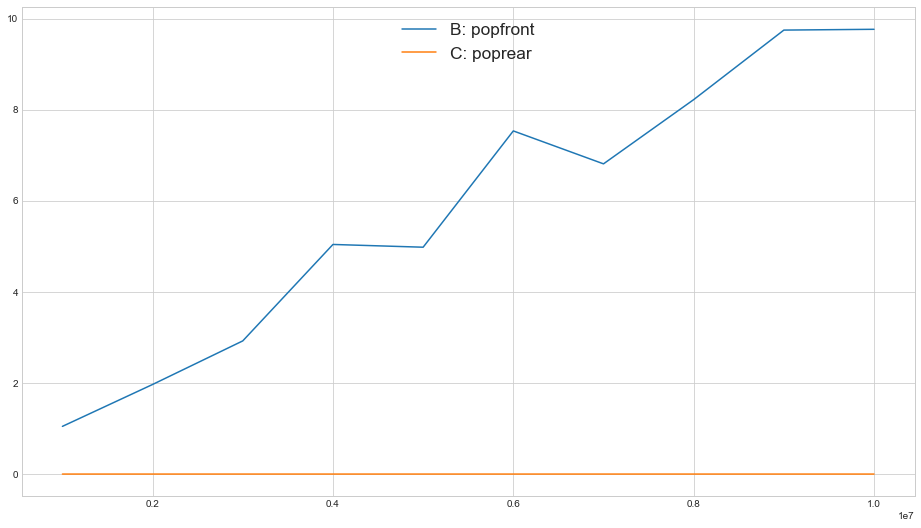

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))

plt.plot(A, B, label="B: popfront")
plt.plot(A, C, label='C: poprear')


plt.legend(loc="upper center", fontsize="xx-large")
plt.show()